<a href="https://colab.research.google.com/github/ReshmaSharma79/GRIPJULY2021/blob/main/TASK_1_Predicting_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP:THE SPARKS FOUNDATION

DATA SCIENCE & BUSINESS ANALYTICS


In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# reading data from the given url (remote link) using pandas

url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)

print("Successfully imported the data!")
student_data

Successfully imported the data!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:

# describe - view basic statistical data

student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


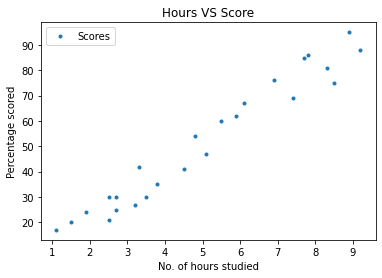

In [ ]:

#plotting the graph - scores vs no. of hours studied

student_data.plot(x="Hours", y="Scores", style=".")
plt.title("Hours VS Score")
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage scored")
plt.show()

In [ ]:
#Preparing the data - separating the data into X (no. of hours) and Y (score)

x=student_data.iloc[:,:-1].values
y=student_data.iloc[:,1].values

In [ ]:
x 
#x -> input

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:

y
#y -> predicted output

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [ ]:
#split data as into train/test datasets using Scikit-learn;s built-in function

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:

x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [ ]:

x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [ ]:

y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [ ]:
y_test


array([20, 27, 69, 30, 62])

In [ ]:
#design & train the model // Linear Regression

from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("Done!")

Done!


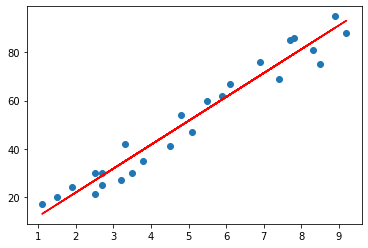

In [ ]:

#Plotting regression line

line=regressor.coef_*x+regressor.intercept_    #y=mx+c
#for test data
plt.scatter(x,y)
plt.plot(x,line,color="red")
plt.show()

In [ ]:
#predictions using testing data

print(x_test) # in Hours
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:

#comparing predicted vc actual
df = pd.DataFrame({'Predicted':y_pred,'Actual': y_test })
df

,Predicted,Actual
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


In [ ]:

#evaluation of the model

from sklearn import metrics

#Mean Absolute Error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#Max Error
print('Max Error:', metrics.max_error(y_test, y_pred))
#Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Max Error: 6.732260779489835
Mean Squared Error: 21.598769307217456


In [ ]:

#predicting score if a student studies for 9.25 hrs/ day

hrs=9.25
pred_score = regressor.predict([[hrs]])
print(f"No. of Hours: {hrs}")
print(f"Predicted Score: {pred_score[0]}")


No. of Hours: 9.25
Predicted Score: 93.69173248737539
